# Analysing Image Classification Dataset

## Installation & Setting Up

## Download Imagenette Dataset

## Load and Format Annotations

In [1]:
import pandas as pd

In [2]:
data_dir = 'imagenette2-160/'
csv_path = 'imagenette2-160/noisy_imagenette.csv'

In [3]:
label_map = {
    'n02979186': 'cassette_player', 
    'n03417042': 'garbage_truck', 
    'n01440764': 'tench', 
    'n02102040': 'English_springer', 
    'n03028079': 'church',
    'n03888257': 'parachute', 
    'n03394916': 'French_horn', 
    'n03000684': 'chain_saw', 
    'n03445777': 'golf_ball', 
    'n03425413': 'gas_pump'
}

Load the annotation provided with the dataset.

In [4]:
df_annot = pd.read_csv(csv_path)
df_annot.head(3)

,path,noisy_labels_0,noisy_labels_1,noisy_labels_5,noisy_labels_25,noisy_labels_50,is_valid
0,train/n02979186/n02979186_9036.JPEG,n02979186,n02979186,n02979186,n02979186,n02979186,False
1,train/n02979186/n02979186_11957.JPEG,n02979186,n02979186,n02979186,n02979186,n03000684,False
2,train/n02979186/n02979186_9715.JPEG,n02979186,n02979186,n02979186,n03417042,n03000684,False


Transform the annotation to fastdup supported format.

In [5]:
# take relevant columns
df_annot = df_annot[['path', 'noisy_labels_0']]

# rename columns to fastdup's column names
df_annot = df_annot.rename({'noisy_labels_0': 'label', 'path': 'filename'}, axis='columns')

# create split column
df_annot['split'] = df_annot['filename'].apply(lambda x: x.split("/")[0])

# map label ids to regular labels
df_annot['label'] = df_annot['label'].map(label_map)

# show formated annotations
df_annot

,filename,label,split
0,train/n02979186/n02979186_9036.JPEG,cassette_player,train
1,train/n02979186/n02979186_11957.JPEG,cassette_player,train
2,train/n02979186/n02979186_9715.JPEG,cassette_player,train
3,train/n02979186/n02979186_21736.JPEG,cassette_player,train
4,train/n02979186/ILSVRC2012_val_00046953.JPEG,cassette_player,train
...,...,...,...
13389,val/n03425413/n03425413_17521.JPEG,gas_pump,val
13390,val/n03425413/n03425413_20711.JPEG,gas_pump,val
13391,val/n03425413/n03425413_19050.JPEG,gas_pump,val
13392,val/n03425413/n03425413_13831.JPEG,gas_pump,val


## Import & Run fastdup

In this example we run fastdup by providing the annotations.

In [6]:
import fastdup
work_dir = 'fastdup_imagenette'

fd = fastdup.create(work_dir=work_dir, input_dir=data_dir) 
fd.run(annotations=df_annot, ccthreshold=0.9, threshold=0.8, overwrite=True, num_images=500)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-04-17 15:02:07 [INFO] Going to loop over dir imagenette2-160
2023-04-17 15:02:07 [INFO] Found total 500 images to run on, 500 train, 0 test, name list 500, counter 500 
2023-04-17 15:02:08 [INFO] Found total 500 images to run on
Finished histogram 0.087
Finished bucket sort 0.094
2023-04-17 15:02:08 [INFO] 45) Finished write_index() NN model
2023-04-17 15:02:08 [INFO] Stored nn model index file fastdup_imagenette/nnf.index
2023-04-17 15:02:08 [INFO] Total time took 1067 ms
2023-04-17 15:02:08 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 %
2023-04-17 15:02:08 [INFO] Found a total of 0 nearly identical images(d>0.980), which are 0.00 %
2023-04-17 15:02:08 [INFO] Found a total of 675 above threshold images (d>0.800), which are 45.00 %
2023-04-17 15:02:08 [INFO] Found a total of 50 outlier images         (d<0.050), which are 3.33 %
2023-04-17 15:02:08 [INFO] Min distance found 0.57

Traceback (most recent call last):
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/sentry.py", line 121, in inner_function
    ret = func(*args, **kwargs)
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/fastdup_controller.py", line 291, in connected_components
    df_cc = self._add_annot_and_split(df_cc, data, merge_on=[FD.ANNOT_FD_ID], split=split, suffix=False,
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/fastdup_controller.py", line 652, in _add_annot_and_split
    df_annot = self._merge_df_with_annot(df, left_on=merge_on, suffix=suffix, unannotated=unannotated, load_crops=load_crops)
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/fastdup_controller.py", line 692, in _merge_df_with_annot
    assert len(df_annot), f"Failed to find valid annotations"
AssertionError: Failed to find valid annotations
Traceback (most recent call last):
  File "/home/dnth


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 13894 images
    Valid images are 0.00% (0) of the data, invalid are 100.00% (13,894) of the data
    For a detailed analysis, use `.invalid_instances()`.

    Components:  failed to find images clustered into components, try to run with lower cc_threshold.
    Outliers: Unable to calculate outliers.


In [7]:
fd.annotations()

,filename,label,split,index,error_code,is_valid
fd_index,,,,,,


## Outliers

Visualize outliers from the dataset.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 34351.38it/s]

Stored outliers visual view in  fastdup_imagenette/galleries/outliers.html



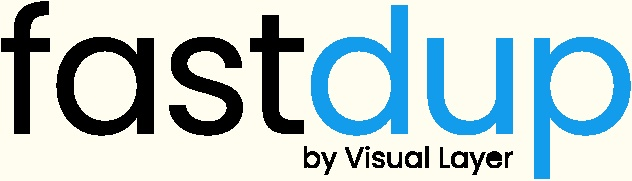
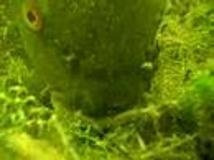
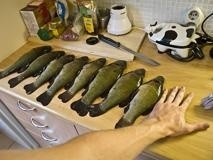
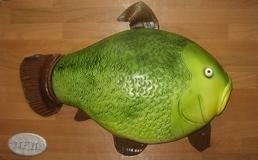
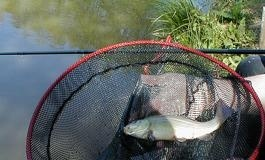
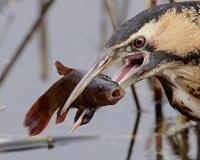
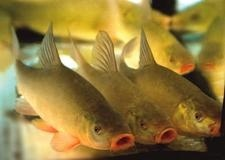
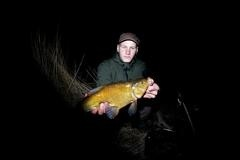
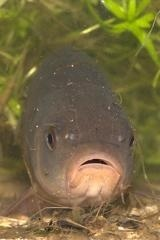
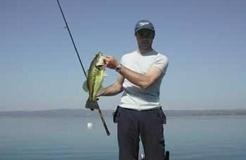
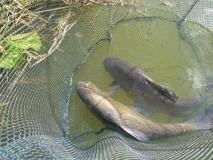
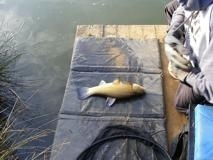
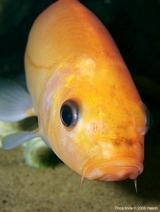
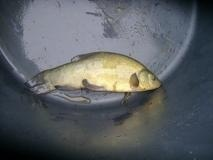
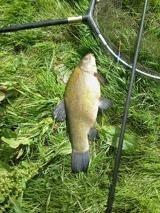
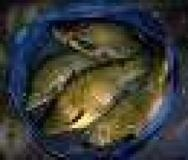
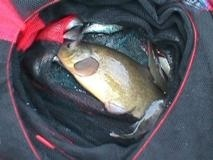
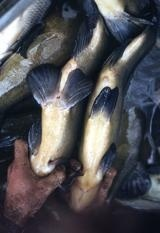
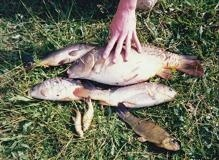
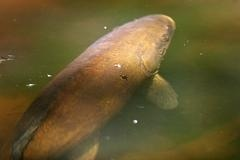
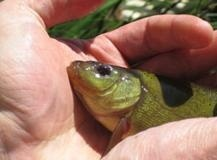

In [8]:
fd.vis.outliers_gallery()

Show outliers image data.

In [9]:
fd.outliers().head(5)

Traceback (most recent call last):
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/sentry.py", line 121, in inner_function
    ret = func(*args, **kwargs)
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/fastdup_controller.py", line 218, in outliers
    df = self._add_annot_and_split(df, data, merge_on=[FD.OUT_ID, FD.OUT_NEAREST_NEIGHBOR], split=split,
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/fastdup_controller.py", line 652, in _add_annot_and_split
    df_annot = self._merge_df_with_annot(df, left_on=merge_on, suffix=suffix, unannotated=unannotated, load_crops=load_crops)
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/fastdup_controller.py", line 692, in _merge_df_with_annot
    assert len(df_annot), f"Failed to find valid annotations"
AssertionError: Failed to find valid annotations


AssertionError: Failed to find valid annotations

## Comparing Labels of Similar Images
Find possible mislabels by comparing a query image to other images in the dataset.

In [ ]:
fd.vis.similarity_gallery() 

## Similar Image Pairs

Find similar image pairs within and across the train and validation subfolders. Pairs may include train-train, train-val, val-train, and val-val.

In [ ]:
fd.vis.duplicates_gallery()

Show similar image pairs.

In [ ]:
fd.similarity().head(5)

## Image Clusters

In [ ]:
fd.vis.component_gallery()

You can also visualize clusters with specific labels using the `slice` parameter. For example let's visualize clusters with the `chain_saw` label

In [ ]:
fd.vis.component_gallery(slice='chain_saw')

## Connected Components

In [ ]:
cc_df, _ = fd.connected_components()
cc_df.sort_values('count', ascending=False).head(5)

We can also get metadata for individual images using their `fastdup_id` available in `fd.annotations()`

In [ ]:
fd[349]